In [1]:
# Install fastbook
%pip install -Uqq fastbook

Note: you may need to restart the kernel to use updated packages.


Totale afbeeldingen gevonden: 51
..\..\Screenshots\d\d1.png
..\..\Screenshots\d\d10.png
..\..\Screenshots\d\d11.png
..\..\Screenshots\d\d12.png
..\..\Screenshots\d\d13.png
..\..\Screenshots\d\d14.png
..\..\Screenshots\d\d15.png
..\..\Screenshots\d\d16.png
..\..\Screenshots\d\d17.png
..\..\Screenshots\d\d2.png
..\..\Screenshots\d\d3.png
..\..\Screenshots\d\d4.png
..\..\Screenshots\d\d5.png
..\..\Screenshots\d\d6.png
..\..\Screenshots\d\d7.png
..\..\Screenshots\d\d8.png
..\..\Screenshots\d\d9.png
..\..\Screenshots\q\q1.png
..\..\Screenshots\q\q2.png
..\..\Screenshots\q\q3.png
..\..\Screenshots\q\q4.png
..\..\Screenshots\q\q5.png
..\..\Screenshots\q\q6.png
..\..\Screenshots\q\q7.png
..\..\Screenshots\q\q8.png
..\..\Screenshots\z\z1.png
..\..\Screenshots\z\z10.png
..\..\Screenshots\z\z11.png
..\..\Screenshots\z\z12.png
..\..\Screenshots\z\z13.png
..\..\Screenshots\z\z14.png
..\..\Screenshots\z\z15.png
..\..\Screenshots\z\z16.png
..\..\Screenshots\z\z17.png
..\..\Screenshots\z\z18.png
..\..

epoch,train_loss,valid_loss,error_rate,time
0,nan,9.659314,0.600000,00:03


c:\Users\Huma Raja\Desktop\Thomas More\2024-2025(3AI)\Semester 1\Deep Learning\Deep-Learning_LAH\project_env\Lib\site-packages\fastprogress\fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,nan,9.659314,0.600000,00:02
1,nan,9.659314,0.600000,00:02
2,nan,9.659314,0.600000,00:02


('d', tensor(0), tensor([9.9995e-01, 5.1299e-05, 3.1624e-07]))


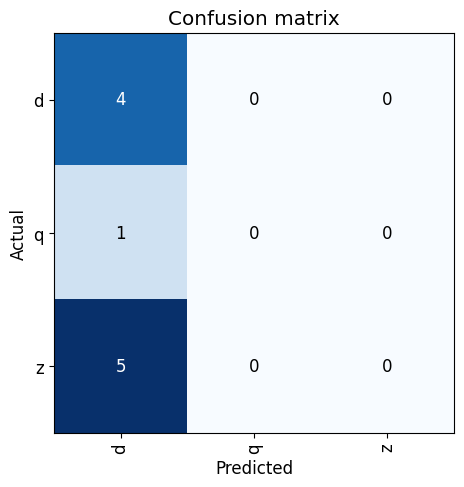

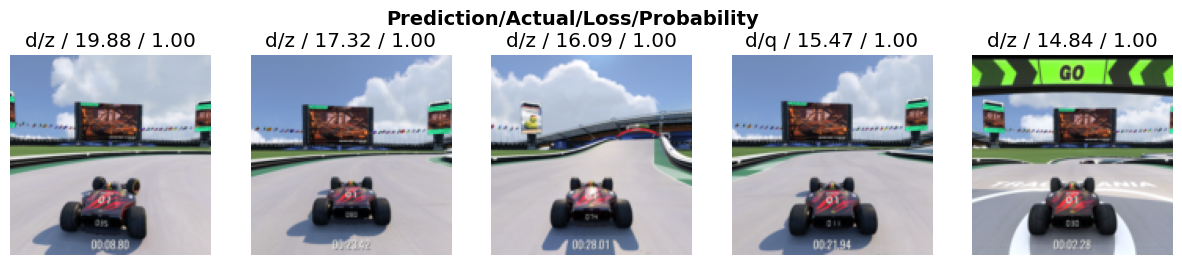

In [9]:
# Importeer de nodige bibliotheken
import fastbook
from fastai.vision.all import *
from fastai.vision.widgets import *

# Definieer het pad naar de afbeeldingen
path = Path('../../Screenshots')  # Zorg ervoor dat dit een Path object is

# Lijst van afbeeldingsbestanden
filenames = get_image_files(path)
print(f"Totale afbeeldingen gevonden: {len(filenames)}")

# Controleer of de afbeeldingen correct worden gelezen
for filename in filenames:
    print(filename)  # Print de bestandsnamen om te controleren of ze correct worden geladen

# Verifieer de afbeeldingen
failed = verify_images(filenames)
print(f"Mislukte afbeeldingen: {failed}")

# Aangepaste labelfunctie om labels uit de mapnamen te halen
def label_func(fname):
    return fname.parent.name  # Dit haalt de mapnaam op als label

# Maak DataLoaders aan met behulp van een DataBlock
customDataset = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Geef afbeeldings- en categoriale types op
    get_items=get_image_files,            # Functie om alle afbeeldingsbestanden te krijgen
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Splits data in train- en validatiesets
    get_y=label_func,                     # Gebruik de labelfunctie die hierboven is gedefinieerd
    item_tfms=Resize(128)                 # Wijzig de grootte van afbeeldingen naar 128x128
)

# Laad de DataLoaders
dls = customDataset.dataloaders(path)

# Controleer of DataLoaders correct zijn aangemaakt
print(f"Aantal trainingsbatches: {len(dls.train)}")
print(f"Aantal validatiebatches: {len(dls.valid)}")

# Snelle controle van de data
if len(dls.train) > 0:
    dls.train.show_batch(max_n=4, nrows=1)
else:
    print("Geen trainingsbatches beschikbaar.")

# Maak een convolutioneel neuraal netwerk aan met behulp van transfer learning
our_out_of_the_box_model = vision_learner(dls, resnet50, metrics=error_rate)
our_out_of_the_box_model.fine_tune(3)

# Interpretatie van de resultaten
interp = ClassificationInterpretation.from_learner(our_out_of_the_box_model)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

# Opslaan van het model
our_out_of_the_box_model.save('first_model')
our_out_of_the_box_model.export()

# **Model laden & inferentie:**
our_out_of_the_box_model_inference = load_learner('export.pkl')

# Test het model op een afbeelding
predictions = our_out_of_the_box_model_inference.predict(Path(path) / 'q/q1.png')  # Voorbeeld voor de map 'q'
print(predictions)



In [11]:
pip install mss


  Obtaining dependency information for mss from https://files.pythonhosted.org/packages/b8/ce/a27f12f03decd8e6d30d3c595671b8dba32e9c33255749eb59a163e8c95c/mss-9.0.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# Importeer de nodige bibliotheken
import fastbook
from fastai.vision.all import *
from fastai.vision.widgets import *
import mss
import numpy as np
from PIL import Image
import time
import pyautogui  # Voeg pyautogui toe om toetsenborden aan te sturen
import logging  # Voeg logging toe

# Configureer logging
logging.basicConfig(level=logging.INFO)

# Laden van het getrainde model
our_out_of_the_box_model_inference = load_learner('export.pkl')

# Functie om het scherm vast te leggen
def capture_screen():
    with mss.mss() as sct:
        monitor = sct.monitors[1]  # Neem het eerste scherm, pas dit aan als je een ander scherm wilt
        screenshot = sct.grab(monitor)
        img = Image.frombytes('RGB', screenshot.size, screenshot.rgb)  # Zet het om naar een PIL afbeelding
        return img

# Functie om het model te laten voorspellen welke richting te nemen
def predict_direction(image):
    image = PILImage.create(image)  # Converteer naar een PILImage dat compatibel is met fastai
    pred, pred_idx, probs = our_out_of_the_box_model_inference.predict(image)
    
    # Debug output om de voorspelling en waarschijnlijkheden weer te geven
    logging.info(f"Voorspelling: {pred}, Index: {pred_idx}, Waarschijnlijkheden: {probs}")
    
    return pred, pred_idx, probs  # Teruggeven van de voorspelling, index en waarschijnlijkheden

# Functie om het juiste toetsenbordcommando te sturen
def send_command(direction):
    # Hier kun je de richting omzetten naar de corresponderende toets
    if direction == 'z':   # Pas deze labels aan op basis van je model's voorspelling
        pyautogui.press('z')  # 'z' voor omhoog
        logging.info("Toets 'z' ingedrukt voor omhoog.")
    elif direction == 'down':
        pyautogui.press('down')  # 'down' voor omlaag
        logging.info("Toets 'down' ingedrukt voor omlaag.")
    elif direction == 'q':
        pyautogui.press('q')  # 'q' voor naar links
        logging.info("Toets 'q' ingedrukt voor naar links.")
    elif direction == 'd':
        pyautogui.press('d')  # 'd' voor naar rechts
        logging.info("Toets 'd' ingedrukt voor naar rechts.")
    else:
        logging.warning(f"Geen bekende richting: {direction}")

# Continu screen capturing en voorspellingen uitvoeren
try:
    last_time = time.time()  # Timer initialisatiedddddddd
    while True:
        current_time = time.time()
        if current_time - last_time >= 1:  # Elke seconde voorspellingen doen
            # Neem een screenshot
            screen_image = capture_screen()

            # Maak een voorspelling met het model
            direction, pred_idx, probabilities = predict_direction(screen_image)
            
            # Stuur het commando naar het toetsenbord
            send_command(direction)

            last_time = current_time  # Update de timer

except KeyboardInterrupt:
    logging.info("Programma gestopt door de gebruiker.")


INFO:root:Voorspelling: d, Index: 0, Waarschijnlijkheden: tensor([0.9318, 0.0185, 0.0497])
INFO:root:Toets 'd' ingedrukt voor naar rechts.


INFO:root:Voorspelling: d, Index: 0, Waarschijnlijkheden: tensor([0.9203, 0.0300, 0.0497])
INFO:root:Toets 'd' ingedrukt voor naar rechts.


INFO:root:Voorspelling: d, Index: 0, Waarschijnlijkheden: tensor([0.6878, 0.1216, 0.1906])
INFO:root:Toets 'd' ingedrukt voor naar rechts.


INFO:root:Voorspelling: d, Index: 0, Waarschijnlijkheden: tensor([0.7002, 0.1132, 0.1866])
INFO:root:Toets 'd' ingedrukt voor naar rechts.


INFO:root:Programma gestopt door de gebruiker.
